# Module 8: Histogram and CDF

A deep dive into Histogram + CDF. 

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd
%matplotlib inline 

`matplotlib` 2.1 has a bug in the histogram. Make sure to have version 2.2.

In [120]:
import matplotlib
matplotlib.__version__

'3.0.3'

## The tricky histogram with pre-counted data

Let's revisit the table from the class

| Hours | Frequency |
|-------|-----------|
| 0-1   | 4,300     |
| 1-3   | 6,900     |
| 3-5   | 4,900     |
| 5-10  | 2,000     |
| 10-24 | 2,100     |

You can draw a histogram by just providing bins and counts instead of a list of numbers. So, let's try that. 

In [121]:
bins = [0, 1, 3, 5, 10, 24]
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100}

**Q: Draw histogram using this data. Don't normalize it for now.** Useful query: [Google search: matplotlib histogram pre-counted](https://www.google.com/search?client=safari&rls=en&q=matplotlib+histogram+already+counted&ie=UTF-8&oe=UTF-8#q=matplotlib+histogram+pre-counted)

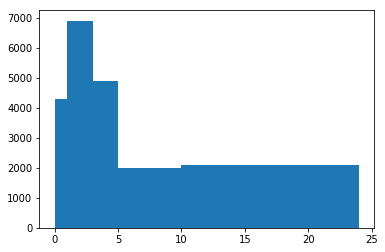

In [122]:
# TODO: draw a histogram with weighted data. 
# Hint: list(an_array) can make the array to list, which is the required input format of hist function
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100}
data_list = list(data.keys())
freq_list = list(data.values())
f = plt.hist(data_list, weights = freq_list, bins = bins)


As you can see, the **default histogram does not normalize with binwidth and simply shows the counts**! This can be very misleading if you are working with variable bin width (e.g. logarithmic bins). So please be mindful about histograms when you work with variable bins. 

**Q: You can fix this by using the `density` option. **

Text(0, 0.5, 'Density')

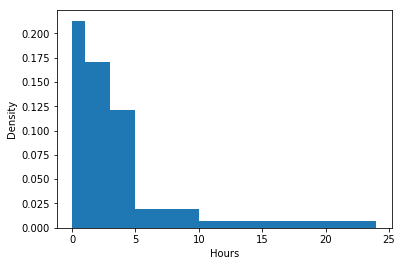

In [123]:
# TODO: fix it with density option. 
f = plt.hist(data_list, weights = freq_list, bins = bins, density = True)
plt.xlabel('Hours')
plt.ylabel('Density')

## Let's use an actual dataset

In [124]:
import vega_datasets

In [125]:
movies = vega_datasets.data.movies()
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


Let's plot the histogram of IMDB ratings. 

C:\Users\sures\New_folder\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sures\New_folder\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <a list of 10 Patch objects>)

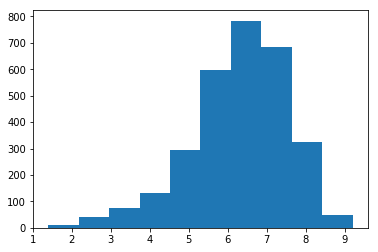

In [126]:
plt.hist(movies.IMDB_Rating)

If you run the above cell, you get an error? What's going on? 

The problem is that the column contains `NaN` (Not a Number) values, i.e. missing data. The following command check whether each value is a `NaN` and returns the result. 

In [127]:
movies.IMDB_Rating.isna()

0       False
1       False
2       False
3        True
4       False
5        True
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13       True
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28      False
29       True
        ...  
3171    False
3172    False
3173    False
3174    False
3175    False
3176    False
3177    False
3178    False
3179     True
3180    False
3181    False
3182     True
3183    False
3184    False
3185    False
3186    False
3187    False
3188     True
3189     True
3190    False
3191    False
3192     True
3193    False
3194    False
3195    False
3196    False
3197     True
3198    False
3199    False
3200    False
Name: IMDB_Rating, Length: 3201, dtype: bool

As you can see there are a bunch of missing rows. You can count them. 

In [128]:
sum(movies.IMDB_Rating.isna())

213

or drop them. 

In [129]:
IMDB_ratings_nan_dropped = movies.IMDB_Rating.dropna()
len(IMDB_ratings_nan_dropped)

2988

In [130]:
len(IMDB_ratings_nan_dropped) + 213

3201

The `dropna` can be applied to the dataframe too. 

**Q: drop rows from `movies` dataframe where either `IMDB_Rating` or `IMDB_Votes` is `NaN`.**

In [131]:
# TODO
movies = movies.dropna(subset=['IMDB_Rating'] or ['IMDB_Votes']) 

In [132]:
# Both should be zero. 
print(sum(movies.IMDB_Rating.isna()), sum(movies.IMDB_Votes.isna()))

0 0


How does `matplotlib` decides the bins? Actually `matplotlib`'s `hist` function uses `numpy`'s `histogram` function under the hood. 

**Q: Plot the histogram of movie ratings (`IMDB_Rating`) using the `plt.hist()` function.**

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <a list of 10 Patch objects>)

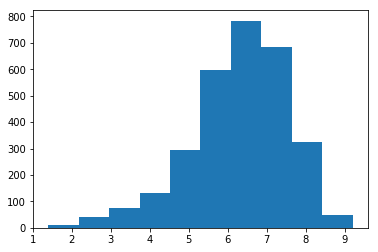

In [133]:
# TODO
plt.hist(movies['IMDB_Rating'])

Have you noticed that this function returns three objects? Take a look at the documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to figure out what they are.

To get the returned three objects:

[  9.  39.  76. 133. 293. 599. 784. 684. 323.  48.]
[1.4  2.18 2.96 3.74 4.52 5.3  6.08 6.86 7.64 8.42 9.2 ]


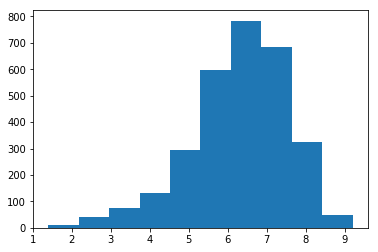

In [134]:
n_raw, bins_raw, patches = plt.hist(movies['IMDB_Rating'])
print(n_raw)
print(bins_raw)

Here, `n_raw` contains the values of histograms, i.e., the number of movies in each of the 10 bins. Thus, the sum of the elements in `n_raw` should be equal to the total number of movies. 

**Q: Test whether the sum of values in `n_raw` is equal to the number of movies in the `movies` dataset**

In [135]:
# TODO: test whether the sum of the numbers in n_raw is equal to the number of movies. 
print(sum(n_raw))
print(len(IMDB_ratings_nan_dropped))

2988.0
2988


The second returned object (`bins_raw`) is a list containing the edges of the 10 bins: the first bin is \[1.4, 2.18\], the second \[2.18, 2.96\], and so on. What's the width of the bins?

In [136]:
np.diff(bins_raw)

array([0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78])

The width is same as the maximum value minus minimum value, divided by 10. 

In [178]:
min_rating = min(movies.IMDB_Rating)
max_rating = max(movies.IMDB_Rating)
print(min_rating, max_rating)
width = (max_rating-min_rating) / 10
print(width)

1.4 9.2
0.7799999999999999


Now, let's plot a normalized (density) histogram. 

[0.0038616  0.0167336  0.03260907 0.05706587 0.12571654 0.25701095
 0.33638829 0.29348162 0.13858854 0.0205952 ]
10
[1.4  2.18 2.96 3.74 4.52 5.3  6.08 6.86 7.64 8.42 9.2 ]


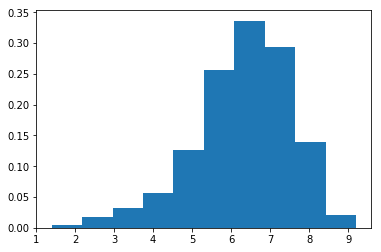

In [168]:
n, bins, patches = plt.hist(movies.IMDB_Rating, density=True)
print(n)
print(len(n))
print(bins)

The ten bins do not change. But now `n` represents the density of the data inside each bin. In other words, the sum of the area of each bar will equal to 1. 

**Q: Can you verify this?**

Hint: the area of each bar is calculated as height * width. You may get something like 0.99999999999999978 instead of 1.

In [197]:
# TODO
#area_each_bar = bins[0]*np.diff(bins_raw)[0]
tot = 0
for i in range(0,len(n)):
    height = n[i]
    area = width * height
    tot += area
print(tot)

1.0


Anyway, these data generated from the `hist` function is calculated from `numpy`'s `histogram` function. https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html 

Note that the result of `np.histogram()` is same as that of `plt.hist()`. 

In [140]:
np.histogram(movies.IMDB_Rating)

(array([  9,  39,  76, 133, 293, 599, 784, 684, 323,  48], dtype=int64),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]))

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <a list of 10 Patch objects>)

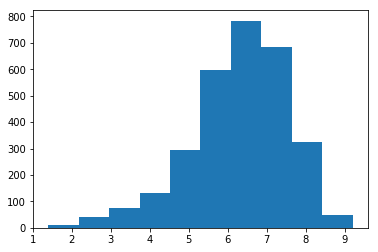

In [141]:
plt.hist(movies.IMDB_Rating)

If you look at the documentation, you can see that `numpy` uses simply 10 as the default number of bins. But you can set it manually or set it to be `auto`, which is the "Maximum of the `sturges` and `fd` estimators.". Let's try this `auto` option. 

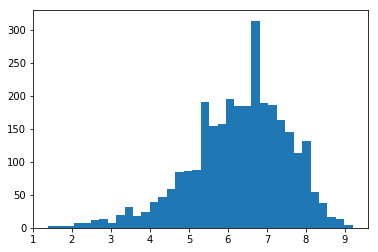

In [142]:
_ = plt.hist(movies.IMDB_Rating, bins='auto')

## Consequences of the binning parameter

Let's explore the effect of bin size using small multiples. In `matplotlib`, you can use [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8) to put multiple plots into a single figure. 

For instance, you can do something like:

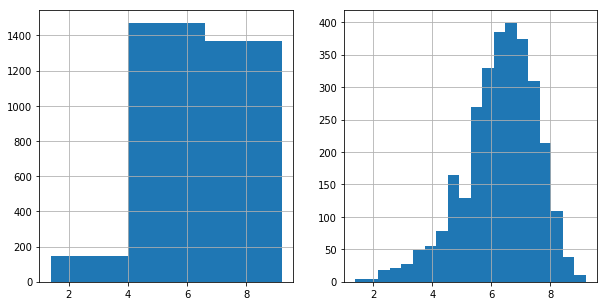

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movies.IMDB_Rating.hist(bins=3)
plt.subplot(1,2,2)
movies.IMDB_Rating.hist(bins=20)

What does the argument in `plt.subplot(1,2,1)` mean? If you're not sure, check out: http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

**Q: create 8 subplots (2 rows and 4 columns) with the following `binsizes`.**

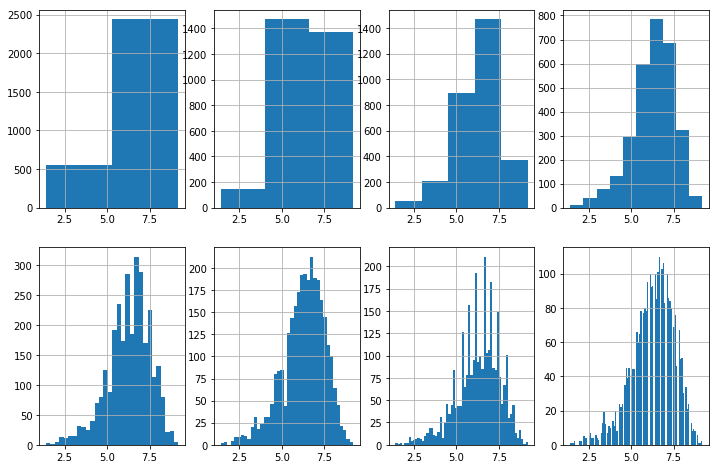

In [144]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

# TODO
plt.figure(figsize=(12,8))
for i, bins in enumerate(binsizes, start = 1): 
    plt.subplot(2,4,i)
    movies.IMDB_Rating.hist(bins=bins)

In [145]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

for bins in binsizes: 
    n_raw, bins_raw, patches = plt.hist(movies['IMDB_Rating'], bins = bins)
    plt.clf()
    print(n_raw)

[ 550. 2438.]
[ 148. 1471. 1369.]
[  48.  209.  892. 1468.  371.]
[  9.  39.  76. 133. 293. 599. 784. 684. 323.  48.]
[  3.   2.   4.  13.  12.  14.  14.  32.  30.  24.  39.  70.  80. 125.
  88. 191. 235. 173. 285. 185. 314. 289. 170. 225. 113. 131.  79.  21.
  23.   4.]
[  2.   3.   0.   4.   9.   9.  11.  10.   7.  20.  31.  18.  24.  31.
  32.  46.  80.  84.  85.  44. 126. 143. 157. 173. 192. 193. 186. 213.
 189. 186. 164. 145. 113. 101.  64.  45.  21.  17.   7.   3.]
[  2.   1.   2.   0.   2.   2.   9.   4.   5.   7.   8.   6.   4.  10.
  13.  19.  19.  11.  10.  14.  31.   8.  24.  46.  35.  45.  84.  41.
  44.  44. 126.  65.  78. 157.  78.  95. 192.  93. 100.  85. 211. 103.
 106. 183.  86.  84. 149.  76.  46.  67. 101.  30.  34.  45.  13.   8.
  17.   6.   1.   3.]
[  1.   1.   1.   2.   0.   0.   0.   2.   2.   0.   5.   4.   4.   0.
   5.   7.   4.   4.   0.   6.   4.   3.   0.   7.  13.  19.  12.   0.
   7.  11.  10.   0.  14.  11.  20.   8.   0.  24.  22.  24.   0.  35.
  45.

<Figure size 432x288 with 0 Axes>

Do you see the issues with having too few bins or too many bins? In particular, do you notice weird patterns that emerge from `bins=30`? 

**Q: Can you guess why do you see such patterns? What are the peaks and what are the empty bars? What do they tell you about choosing the binsize in histograms?**

# Answer
When the bin sizes are increased gradually, at some point, the "noise" in the data will start emerging. An individual bin can create an isolted spike or an empty bin can cause a gap. As can be seen in the above lists of bins list, as the number of bins are increased, some of them has zero items in it while some has too many. 

This tell us how critical it is to select the right number of bins to depict the distribution of the underlying data accurately.

## Formulae for choosing the number of bins. 

We can manually choose the number of bins based on those formulae. 

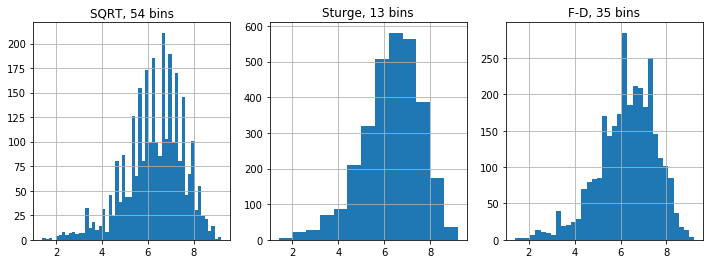

In [146]:
N = len(movies)

plt.figure(figsize=(12,4))

# Sqrt 
nbins = int(np.sqrt(N))

plt.subplot(1,3,1)
plt.title("SQRT, {} bins".format(nbins))
movies.IMDB_Rating.hist(bins=nbins)

# Sturge's formula
nbins = int(np.ceil(np.log2(N) + 1))

plt.subplot(1,3,2)
plt.title("Sturge, {} bins".format(nbins))
movies.IMDB_Rating.hist(bins=nbins)

# Freedman-Diaconis
iqr = np.percentile(movies.IMDB_Rating, 75) - np.percentile(movies.IMDB_Rating, 25)
width = 2*iqr/np.power(N, 1/3)
nbins = int((max(movies.IMDB_Rating) - min(movies.IMDB_Rating)) / width)

plt.subplot(1,3,3)
plt.title("F-D, {} bins".format(nbins))
movies.IMDB_Rating.hist(bins=nbins)



But we can also use built-in formulae too. Let's try all of them. 

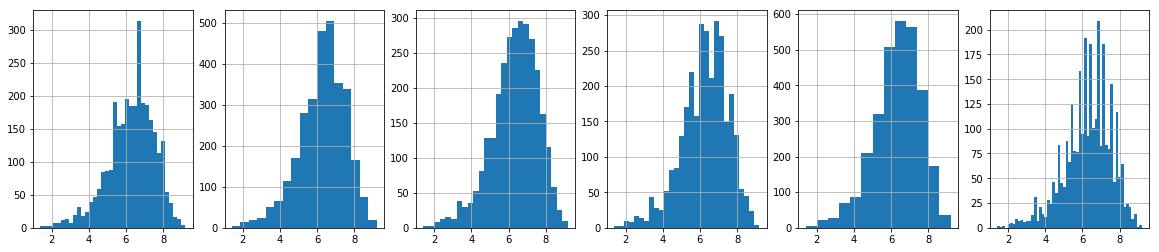

In [147]:
plt.figure(figsize=(20,4))

plt.subplot(161)
movies.IMDB_Rating.hist(bins='fd')

plt.subplot(162)
movies.IMDB_Rating.hist(bins='doane')

plt.subplot(163)
movies.IMDB_Rating.hist(bins='scott')

plt.subplot(164)
movies.IMDB_Rating.hist(bins='rice')

plt.subplot(165)
movies.IMDB_Rating.hist(bins='sturges')

plt.subplot(166)
movies.IMDB_Rating.hist(bins='sqrt')

Some are decent, but several of them tend to overestimate the good number of bins. As you have more data points, some of the formulae may overestimate the necessary number of bins. Particularly in our case, because of the precision issue, we shouldn't increase the number of bins too much.

### So how should we choose the number of bins?

So what's the conclusion? use Scott's rule or Sturges' formula? No, I think the take away is that you should understand how the inappropriate number of bins can mislead you and you should try multiple number of bins to obtain the most accurate picture of the data. Although the 'default' may work in most cases, don't blindly trust it! Don't judge a dataset (maybe more like "a column") based on a single histogram. Try multiple parameters to get the full picture!

## CDF (Cumulative distribution function)

Drawing a CDF is very easy. Because it's very common data visualization, histogram has an option called `cumulative`. 

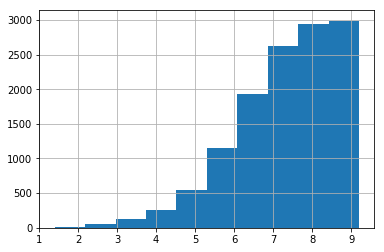

In [148]:
movies.IMDB_Rating.hist(cumulative=True)

You can also combine with options such as `histtype` and `density`.

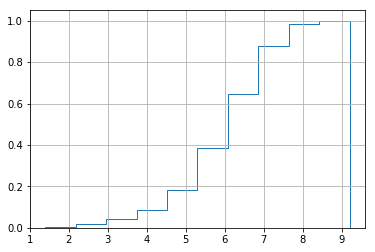

In [149]:
movies.IMDB_Rating.hist(histtype='step', cumulative=True, density=True)

And increase the number of bins. 

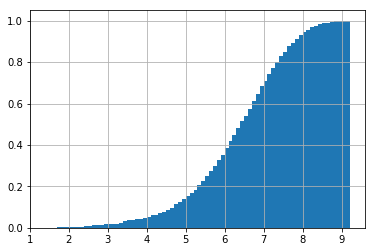

In [150]:
movies.IMDB_Rating.hist(cumulative=True, density=True, bins=1000)

This method works fine. By increasing the number of bins, you can get a CDF in the resolution that you want. But let's also try it more manually. First, we should sort all the values. 

In [151]:
rating_sorted = movies.IMDB_Rating.sort_values()
rating_sorted.head()

1247    1.4
406     1.5
1754    1.6
1590    1.7
1515    1.7
Name: IMDB_Rating, dtype: float64

In [152]:
N = len(rating_sorted)
N

2988

And I think this may be useful for you. 

In [153]:
n = 50
y_axis = np.linspace(1/n, 1.0, num=n)

**Q: now you're ready to draw a proper CDF. Draw the CDF plot of this data.** 

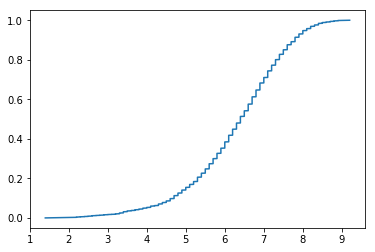

In [154]:
a = movies['IMDB_Rating']
plt.plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False))

## A bit more histogram with altair

As you may remember, you can get a pandas dataframe from `vega_datasets` package and use it to create visualizations. But, if you use `altair`, you can simply pass the URL instead of the actual data. 

In [155]:
vega_datasets.data.movies.url

'https://vega.github.io/vega-datasets/data/movies.json'

In [156]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

As mentioned before, in `altair` histogram is not special. It is just a plot that use bars (`mark_bar()`) where X axis is defined by `IMDB_Rating` with bins (`bin=True`), and Y axis is defined by `count()` aggregation function. 

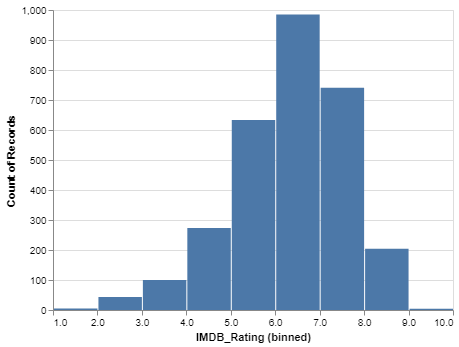

In [157]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=True),
    alt.Y('count()')
)

Have you noted that it is `IMDB_Rating:Q` not `IMDB_Rating`? This is a shorthand for

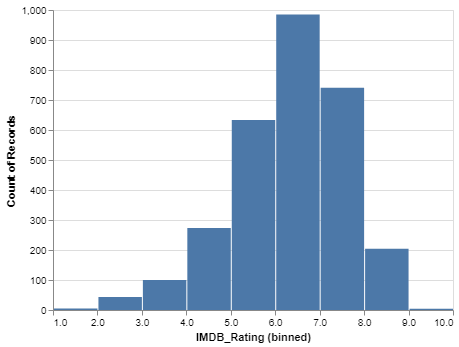

In [158]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X('IMDB_Rating', type='quantitative', bin=True),
    alt.Y(aggregate='count', type='quantitative')
)

In altair, you want to specify the data types using one of the four categories: quantitative, ordinal, nominal, and temporal. https://altair-viz.github.io/user_guide/encoding.html#data-types

Although you can adjust the bins in `altair`, it does not encourage you to set the bins directly. For instance, although there is `step` parameter that directly sets the bin size, there are parameters such as `maxbins` (maximum number of bins) or `minstep` (minimum allowable step size), or `nice` (attemps to make the bin boundaries more human-friendly), that encourage you not to specify the bins directly. 

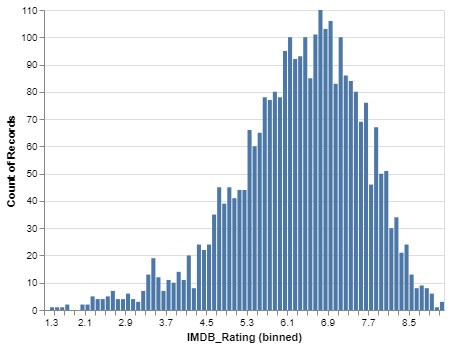

In [159]:
from altair import Bin

alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(step=0.1)),
    alt.Y('count()')
)

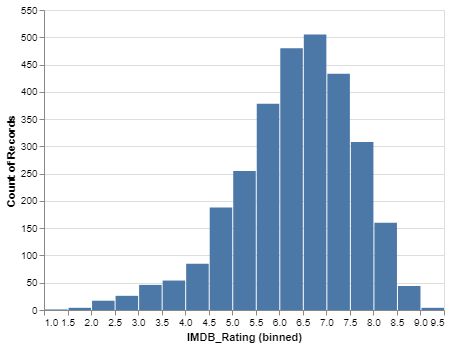

In [160]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
)

### Composing charts in altair

`altair` has a very nice way to compose multiple plots. Two histograms side by side? just do the following.

In [161]:
chart1 = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(step=0.1)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)
chart2 = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)

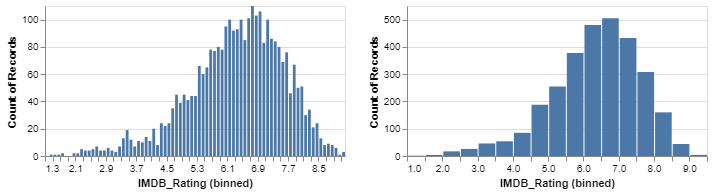

In [162]:
chart1 | chart2

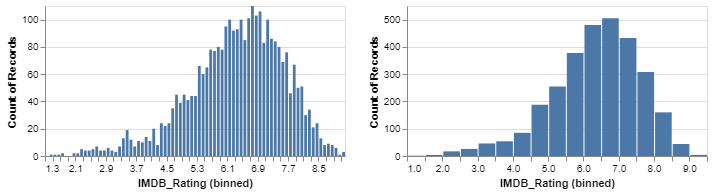

In [163]:
alt.hconcat(chart1, chart2)

Vertical commposition? 

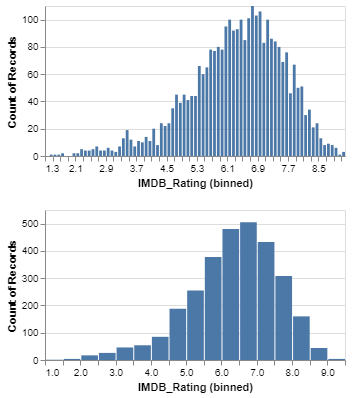

In [164]:
alt.vconcat(chart1, chart2)

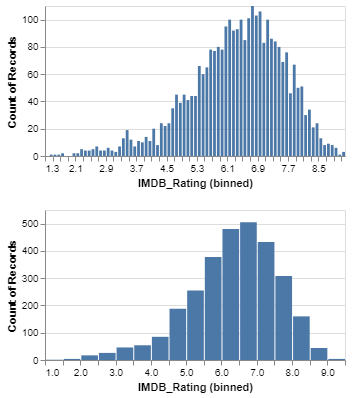

In [165]:
chart1 & chart2

Shall we avoid some repetitions? You can define a *base* empty chart first and then assign encodings later when you put together multiple charts together. Here is an example: https://altair-viz.github.io/user_guide/compound_charts.html#repeated-charts

**Q: Using the base chart approach to create a 2x2 chart where the top row shows the two histograms of `IMDB_Rating` with `maxbins`=10 and 50 respectively, and the bottom row shows another two histograms of `IMDB_Votes` with `maxbins`=10 and 50.**

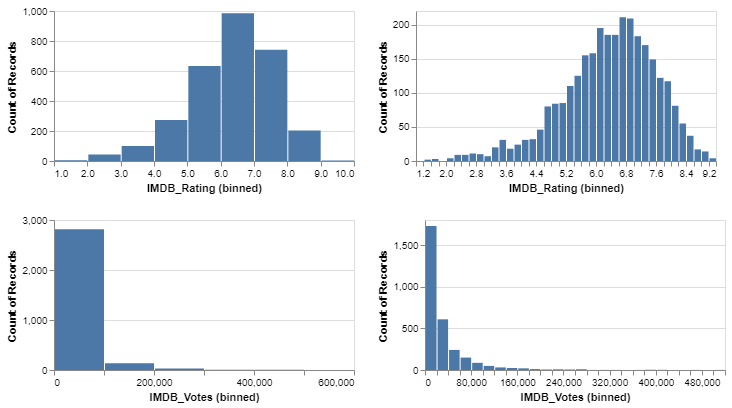

In [166]:
import altair as alt
import vega_datasets
from vega_datasets import data
from altair import Bin
alt.renderers.enable('notebook')

chart_list_1=[]
chart_list_2=[]

for bin_count in (10, 50):
    chart = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
       alt.X('IMDB_Rating:Q', bin=Bin(maxbins=bin_count)),
       alt.Y('count()',type='quantitative')
       ).properties(
        width=300,
        height=150
        )
    chart_list_1.append(chart)

for bin_count in (10, 50):
    chart = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
       alt.X('IMDB_Votes:Q', bin=Bin(maxbins=bin_count)),
       alt.Y('count()',type='quantitative')
       ).properties(
        width=300,
        height=150
        )
    chart_list_2.append(chart)
    
chart_horizontal_1 = chart_list_1[0] | chart_list_1[1]
chart_horizontal_2 = chart_list_2[0] | chart_list_2[1]
alt.vconcat(chart_horizontal_1, chart_horizontal_2)
